<a href="https://colab.research.google.com/github/vipashaaV321/AI-Assignments/blob/master/CNN_MNIST_FEEDFORWARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.models import Sequential  # initial NN
from keras.layers import Dense, Dropout # construct each layer
from keras.layers import Convolution2D # swipe across the image by 1
from keras.layers import MaxPooling2D # swipe across by pool size
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from keras.layers import Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [22]:
#Load data
(train_images,train_label),(test_images,test_labels)=datasets.mnist.load_data()
train_images,test_images=train_images/255.0,test_images/255.0
train_labels = to_categorical(train_label)
test_labels = to_categorical(test_labels)

In [23]:

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


#Feed Forward Network

In [24]:
model=models.Sequential()
# model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Convolution2D (filters = 64, kernel_size = (4,4),padding = 'Same', 
                         activation ='relu', input_shape = (32,32,1))) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
Total params: 38,016
Trainable params: 38,016
Non-trainable params: 0
_________________________________________________________________


In [26]:



#faltten

model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))




In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [28]:


#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9135 - val_loss: 0.1753 - val_accuracy: 0.9504
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1501 - accuracy: 0.9561 - val_loss: 0.1324 - val_accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1088 - accuracy: 0.9680 - val_loss: 0.1099 - val_accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9735 - val_loss: 0.1009 - val_accuracy: 0.9680
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0698 - accuracy: 0.9788 - val_loss: 0.1024 - val_accuracy: 0.9691


313/313 [==============================] - 0s 919us/step - loss: 0.1024 - accuracy: 0.9691


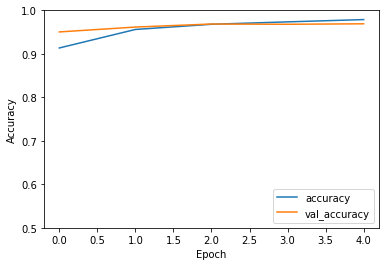

In [29]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels)

In [33]:
#cnn
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
________________________________________________

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2585 - accuracy: 0.9257 - val_loss: 0.0898 - val_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0582 - accuracy: 0.9816 - val_loss: 0.0458 - val_accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0365 - val_accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0331 - val_accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0384 - val_accuracy: 0.9889


313/313 [==============================] - 3s 10ms/step - loss: 0.0384 - accuracy: 0.9889


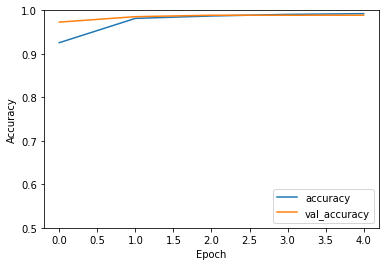

In [32]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels)